# California House Price prediction

## Business Understanding
The California house dataset comprises data on various attributes of houses across different neighborhoods in California. The primary objective is to utilize this dataset to gain insights that can assist stakeholders in the real estate industry, such as real estate agents, buyers, sellers, and investors, in understanding the factors that influence median house value.

## Problem statement
To leverage a California house dataset to predict and understand the median house value in different neighborhoods. The objective is to develop a predictive model that accurately estimates median house values based on various property features. This model will provide valuable insights for stakeholders in the real estate industry, including buyers, sellers, investors, and agents. Additionally, the analysis will focus on identifying key features that significantly influence median house values, assessing neighborhood trends, offering property investment recommendations, and providing dynamic market insights to help stakeholders make informed decisions in the ever-evolving real estate market.

In [20]:
# importing Librarie
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [3]:
# loading the dataset
data = pd.read_csv('housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Displaying basic information about the dataset
info = data.info()

# Getting the shape of the dataset
shape = data.shape

#  description of the dataset's numerical columns
description = data.describe()

# Display the results
print("Dataset Information:")
print(info)
print("\nDataset Shape:")
print(shape)
print("\nDataset Description:")
print(description)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
Dataset Information:
None

Dataset Shape:
(20640, 10)

Dataset Description:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861

In [5]:
# checking for missing values
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
# filling the missing values in bedrooms column
median_bedrooms = data['total_bedrooms'].median()
data['total_bedrooms'].fillna(median_bedrooms, inplace=True)

In [7]:
# confirming if there are any missing values after filling the bedroom column.
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

As we can see there are no missing values

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

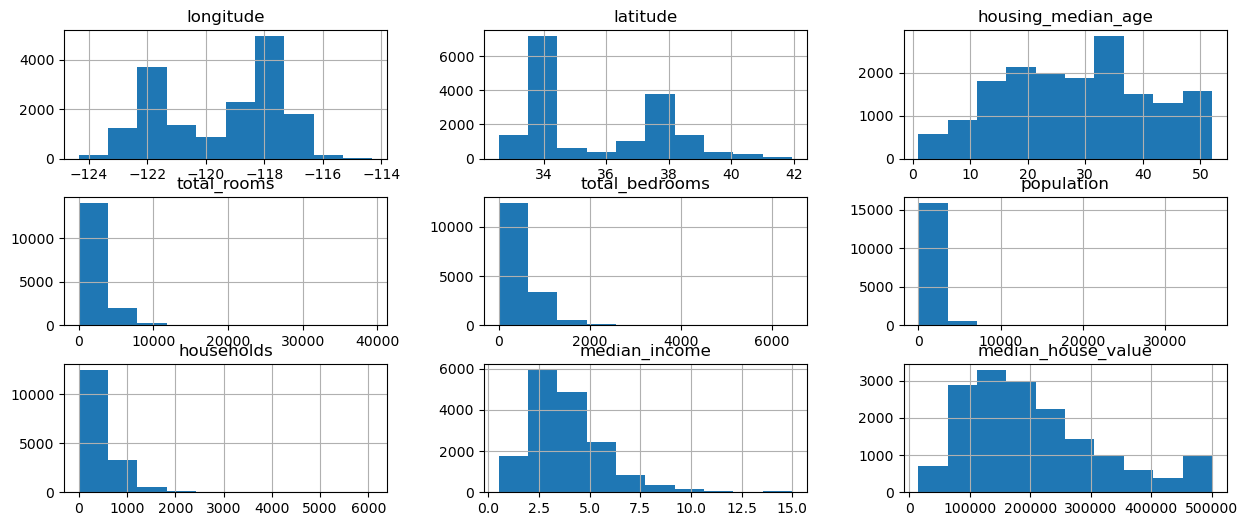

In [8]:
# splitting data for training and testing
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# training the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training data
train_data = X_train.join(y_train)
# plotting histograms for the train data
train_data.hist(figsize=(15, 6))

C:\Users\User\AppData\Local\Temp\ipykernel_8968\1663932951.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

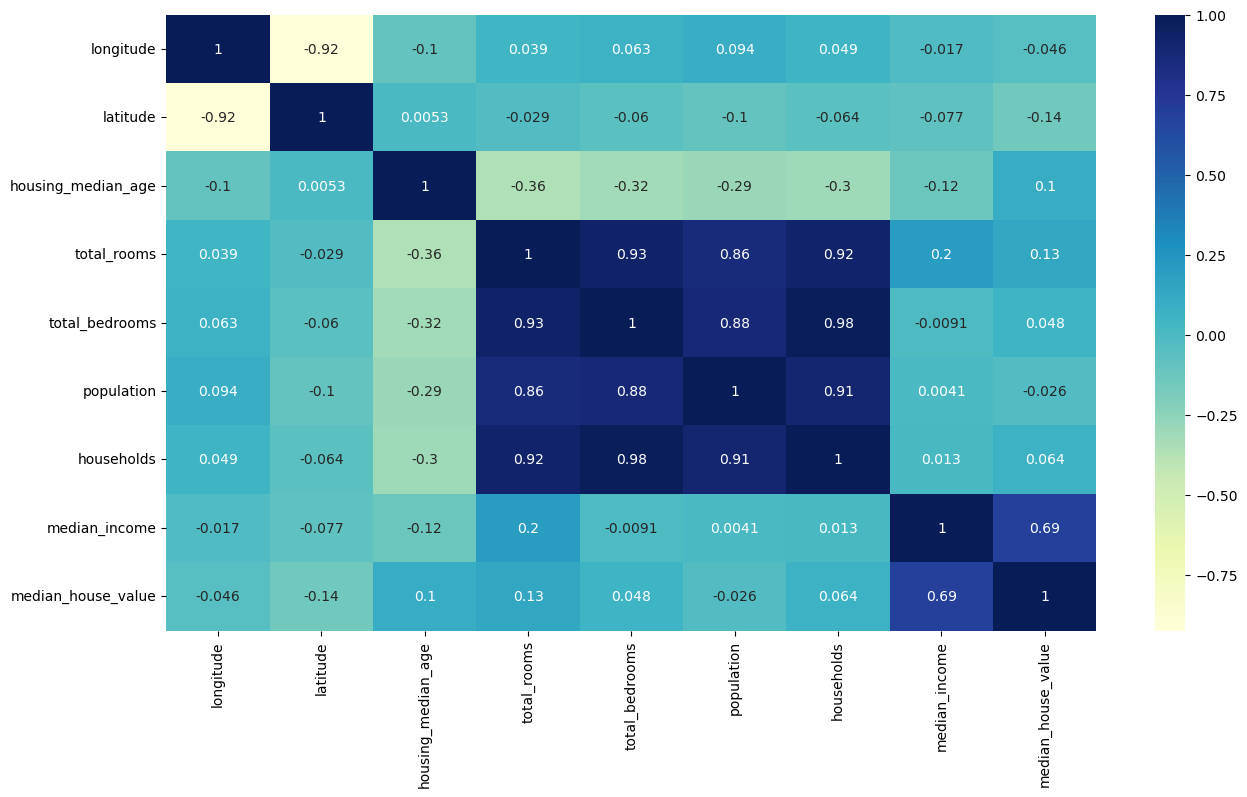

In [9]:
# checking correlations 
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

## Prepocessing

In [10]:
# Applying logarithmic transformation to certain columns for data preprocessing
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

In [16]:
# performing one hot encoding to ocan proximity
train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14196,-117.03,32.71,33.0,8.047829,6.442540,7.741099,6.436150,3.2596,103000.0,0,0,0,0,1
8267,-118.16,33.77,49.0,8.126518,6.669498,7.181592,6.629363,3.8125,382100.0,0,0,0,0,1
17445,-120.48,34.66,4.0,7.548556,5.805135,6.820016,5.820083,4.1563,172600.0,0,0,0,0,1
14265,-117.11,32.69,36.0,7.259820,5.908083,7.257708,5.874931,1.9425,93400.0,0,0,0,0,1
2271,-119.80,36.78,43.0,7.776115,6.068426,6.774224,5.942799,3.5542,96500.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,7.193686,5.308268,6.490724,5.384495,6.3700,229200.0,1,0,0,0,0
11964,-117.43,34.02,33.0,8.034307,6.347389,7.469654,6.109248,3.0500,97800.0,0,1,0,0,0
5390,-118.38,34.03,36.0,7.650645,6.345636,7.471363,6.269096,2.9344,222100.0,1,0,0,0,0
860,-121.96,37.58,15.0,8.182000,6.393591,7.483244,6.327937,5.7192,283500.0,1,0,0,0,0


In [18]:
train_data = pd.get_dummies(train_data, columns=['ocean_proximity'])

In [22]:
# training a linearregression model
# Preprocessing: Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and fitting the LinearRegression model
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

# Making predictions
predictions = linreg.predict(X_test_scaled)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ocean_proximity
Feature names seen at fit time, yet now missing:
- ocean_proximity_<1H OCEAN
- ocean_proximity_INLAND
- ocean_proximity_ISLAND
- ocean_proximity_NEAR BAY
- ocean_proximity_NEAR OCEAN
